## Default of Credit Card Clients

In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1)
df_original =df_original.rename({'PAY_0' : 'PAY_1','default payment next month':'default'},axis=1)
df = df_original.copy()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 exact payment ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10

BILL_AMT i : Billing for ith past month

PAY_AMT i : payment for BILL AMT i+1


In [7]:
df = df_train

In [8]:
df_usage = pd.DataFrame()
df_usage['ID']=df.ID
BILL = [column for column in df.columns if 'BILL' in column]
PAY = [column for column in df.columns if 'PAY_AMT' in column]
for i in range(5):
    df_usage[f"USAGE_{i+1}"] = df[BILL[i]]-(df[BILL[i+1]]-df[PAY[i]])


print(BILL+PAY)
df_difference =pd.DataFrame()
df_difference['ID'] = df.ID
for i in range(5):
    df_difference[f"DIFF_{i}"] = df[BILL[i+1]]-df[PAY[i]]
df = pd.concat([df,df_usage.iloc[:,1:],df_difference.iloc[:,1:]],axis=1)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Logarithmic Scaling attribute (for BILLING and PAY_amount) total 12

In [21]:
df[(abs(df)>0) & (1>abs(df))].sum()

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
USAGE_1      0.0
USAGE_2      0.0
USAGE_3      0.0
USAGE_4      0.0
USAGE_5      0.0
DIFF_0       0.0
DIFF_1       0.0
DIFF_2       0.0
DIFF_3       0.0
DIFF_4       0.0
dtype: float64

In [11]:
def log_pre (x):
    return np.log(1+2*abs(x))*np.sign(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))
USAGE = [column for column in df_usage.columns if column !='ID']
DIFF = [column for column in df_difference.columns if column !='ID']
LIM = ['LIMIT_BAL']
df_log =pd.concat([df.ID,df[LIM+BILL+PAY+USAGE+DIFF].apply(log_pre_col,axis=0)],axis=1) #apply(function,axis=) map of those who use index/column as a index
rename_dict = {}
for i in df_log.iloc[:,1:].columns:
    rename_dict[i] = 'log_'+i
df_log =df_log.rename(rename_dict,axis=1)


In [14]:
df_log.columns

Index(['ID', 'log_LIMIT_BAL', 'log_BILL_AMT1', 'log_BILL_AMT2',
       'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6',
       'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4',
       'log_PAY_AMT5', 'log_PAY_AMT6', 'log_USAGE_1', 'log_USAGE_2',
       'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5', 'log_DIFF_0', 'log_DIFF_1',
       'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')

In [19]:
import random

In [20]:
rd_nums =[]
for i in range(4):
    rd_nums.append(random.randint(0,1000))
L_PAY = [column for column in df.columns if 'log_PAY' in column]
L_BILL = [column for column in df.columns if 'log_BILL' in column]
L_USAGE =  [column for column in df.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in df.columns if 'log_DIFF' in column]
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
print(D_PAY)

In [37]:
df_original.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [35]:
L_PAY+L_BILL+L_USAGE+L_DIFF

['log_PAY_AMT1',
 'log_PAY_AMT2',
 'log_PAY_AMT3',
 'log_PAY_AMT4',
 'log_PAY_AMT5',
 'log_PAY_AMT6',
 'log_BILL_AMT1',
 'log_BILL_AMT2',
 'log_BILL_AMT3',
 'log_BILL_AMT4',
 'log_BILL_AMT5',
 'log_BILL_AMT6',
 'log_USAGE_1',
 'log_USAGE_2',
 'log_USAGE_3',
 'log_USAGE_4',
 'log_USAGE_5',
 'log_DIFF_0',
 'log_DIFF_1',
 'log_DIFF_2',
 'log_DIFF_3',
 'log_DIFF_4']

In [55]:
rd_nums

[218, 898, 663, 466]

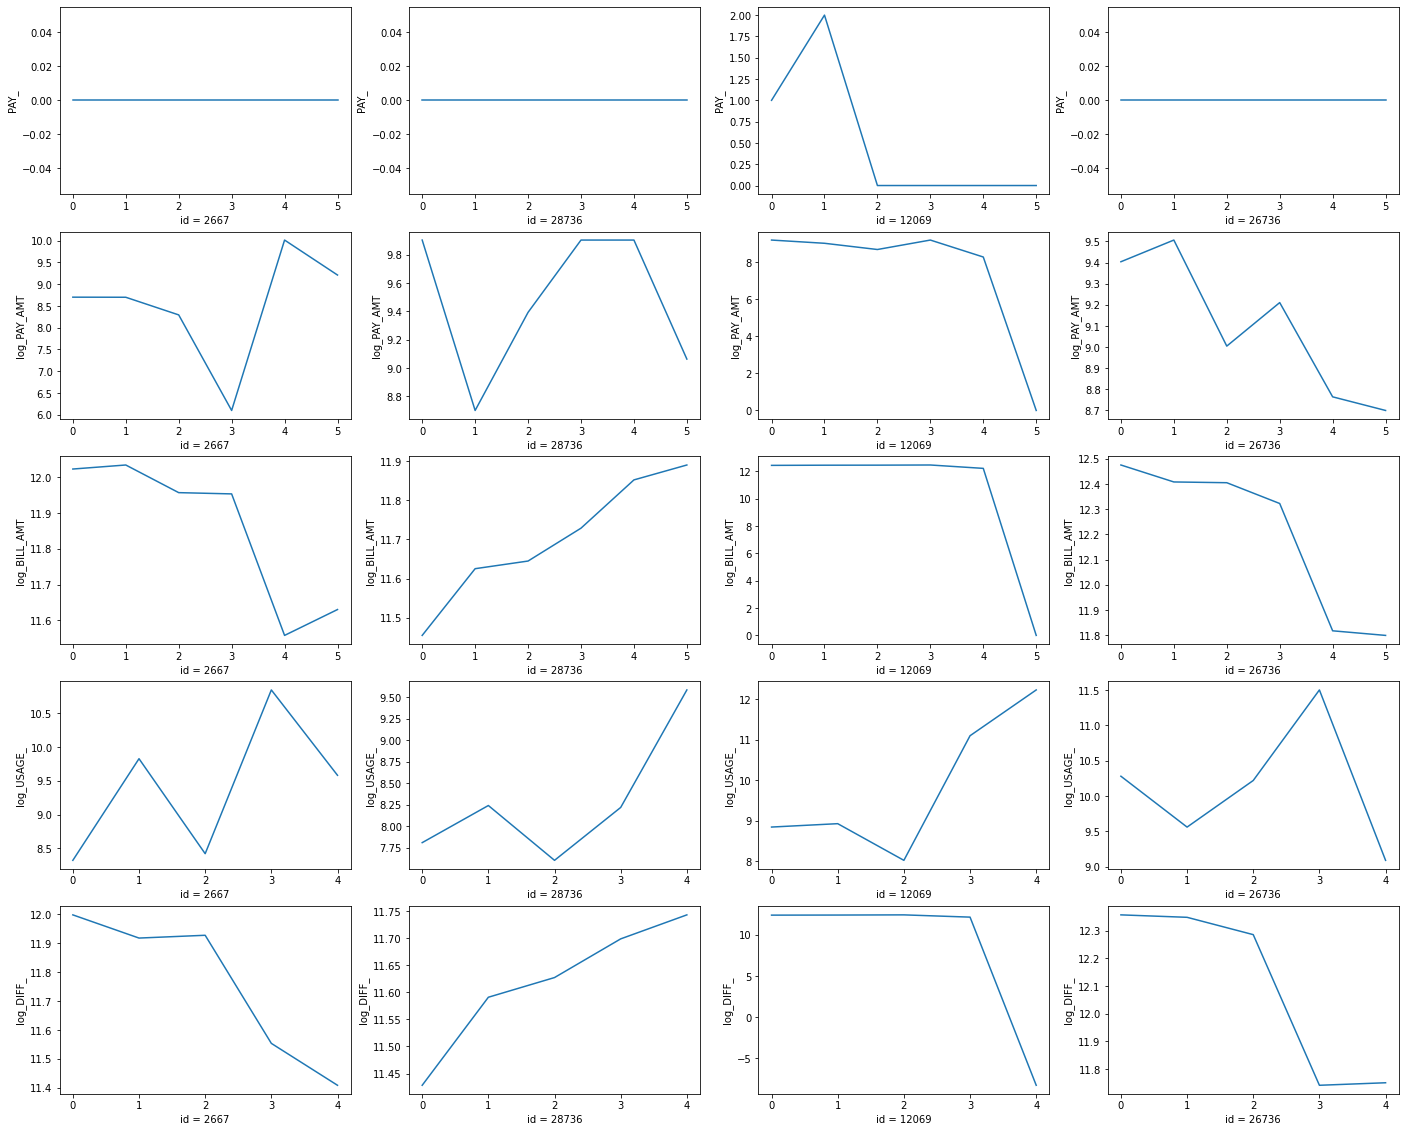

In [25]:
fig, axes = plt.subplots(5,4, clear=True,figsize=(24,20))
for j,rd_num in enumerate(rd_nums):
    for i, cat in enumerate([D_PAY,L_PAY,L_BILL,L_USAGE,L_DIFF]):
        try:
            axes[i,j].plot(range(5),df.iloc[rd_num][cat])
            axes[i,j].set_xticks(range(5))
        except:
            axes[i,j].plot(range(6),df.iloc[rd_num][cat])
        axes[i,j].set_ylabel(cat[0][:-1])
        axes[i,j].set_xlabel(f'id = {int(df.iloc[rd_num]["ID"])}')

plt.show()
    


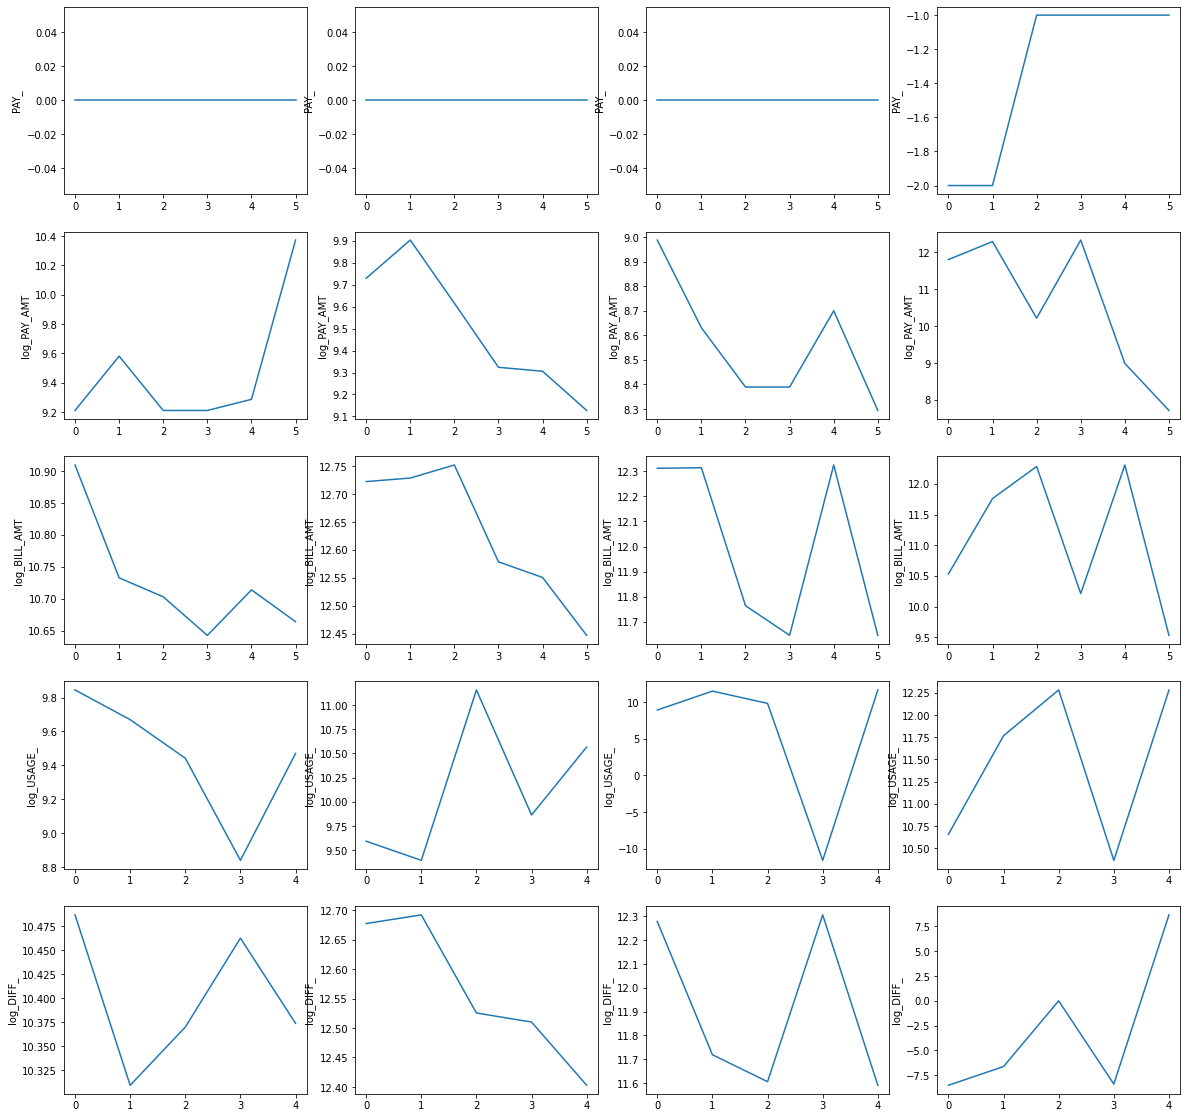

In [57]:
fig, axes = plt.subplots(5,4, clear=True,figsize=(20,20))
for j,rd_num in enumerate(rd_nums):
    for i, cat in enumerate([D_PAY,L_PAY,L_BILL,L_USAGE,L_DIFF]):
        try:
            axes[i,j].plot(range(5),df.iloc[rd_num][cat])
        except:
            axes[i,j].plot(range(6),df.iloc[rd_num][cat])
        axes[i,j].set_ylabel(cat[0][:-1])

plt.show()
    


In [130]:
df[L_PAY].apply(lambda x:x.std() ,axis=1).describe()

count    22500.000000
mean         2.109022
std          1.770042
min          0.000000
25%          0.377146
50%          1.460694
75%          3.806098
max          6.511297
dtype: float64

In [129]:
df[L_PAY].iloc[3].std()

1.5555596660880062

In [121]:
df[L_PAY].describe()

,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,7.209421,7.135657,6.850356,6.626342,6.556734,6.471591
std,3.493802,3.528114,3.612315,3.663293,3.725414,3.802474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.601402,7.438972,6.675823,6.398595,6.178979,5.629413
50%,8.343554,8.299783,8.202756,8.006701,8.006701,8.006701
75%,9.211040,9.210440,9.112507,8.988883,8.988071,8.987322
max,14.373471,15.029984,14.398888,14.032234,13.636361,13.871260


In [26]:
from pyts.multivariate.transformation import MultivariateTransformer
from pyts.transformation import BagOfPatterns as BOP
from sklearn.base import TransformerMixin, BaseEstimator
class my_mbop(BaseEstimator,TransformerMixin):
    def __init__(self,estimator,flatten=True, channel_list=None):
        #time stamp of channel must be same size
        #ex: USAGE and DIFF has size 5 instead of 6
        self.channel_list = channel_list
        self.transformer = MultivariateTransformer(estimator,flatten)
        self.version = 1
    def fit(self,X, y=None):
        if self.channel_list != None:
            sample_size,_ =X.shape
            _,channel_length =X[self.channel_list[0]].shape
            new_X = np.zeros((sample_size,len(self.channel_list),channel_length))
            for i,channel in enumerate(self.channel_list):
                new_X[:,i,:] = X[channel]
        self.transformer.fit(new_X,y=None)
        return self
    def transform(self,X,y=None):
        if self.channel_list != None:
            sample_size,_ =X.shape
            _,channel_length =X[self.channel_list[0]].shape
            new_X = np.zeros((sample_size,len(self.channel_list),channel_length))
            for i,channel in enumerate(self.channel_list):
                new_X[:,i,:] = X[channel]
        return self.transformer.transform(new_X)
    
    

In [27]:
transformer = my_mbop(BOP(window_size=3,word_size=1.0,n_bins=4,
                          strategy='quantile',
                          ),channel_list=[L_USAGE])
print(transformer.channel_list)
x =transformer.fit_transform(df)
print(x.shape)

[['log_USAGE_1', 'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5']]
(22500, 42)
